<a href="https://colab.research.google.com/github/bazsi04/Szakdolgozat/blob/main/Mon_elerheto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importálás

In [ ]:
from heapq import heappush, heappop
import numpy as np
from itertools import combinations
import random
import networkx as nx
import math
import time
import matplotlib.pyplot as plt

### Monoton úton elérhető csúcsok száma

In [ ]:
def m_ba(n, target_edges):
    """
    Becsli az m paramétert a Barabási–Albert modellhez úgy, hogy a generált gráfban
    körülbelül target_edges darab él legyen n csúcs esetén.

    Visszatér n és egy érvényes m értékkel (0 < m < n).
    """

    m1 = round(n-0.5+ math.sqrt((n-0.5)**2-2*target_edges))
    m2 = round(n-0.5- math.sqrt((n-0.5)**2-2*target_edges))

    if m1 > n or m1 < 1:
        m1=m2
    if m1 > n:
        return n-1
    if m1 < 1:
        return 1
    return n, m1

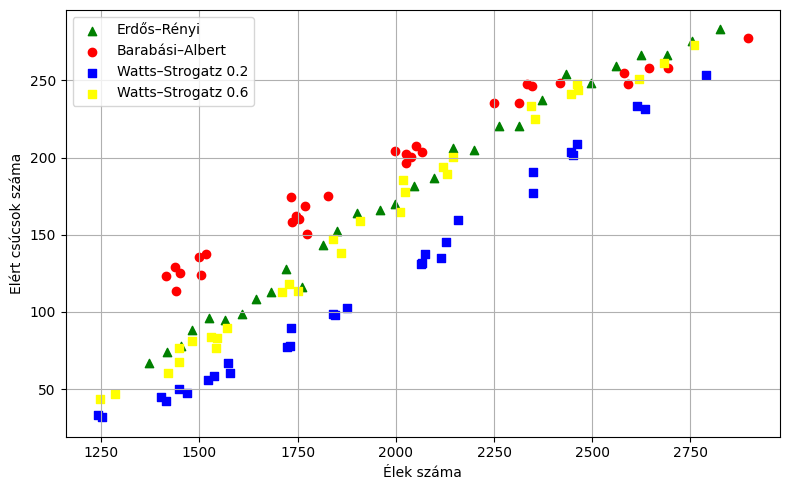

In [ ]:
data_ba = []
data_ws = []
data_ws2 = []
data_er = []
edges_b = []
edges_w = []
edges_ws2 = []
edges_e = []

#paraméterek
n = 300
k=60
t=100
p =0.015

for i in range(0,k,2):

    if i%1==0:
        p = p*1.025


    edges_e1 = 0
    edges_w1 = 0
    edges_w2 = 0
    edges_b1 = 0
    reached_erdos = 0
    reached_barabasi = 0
    reached_watts = 0
    reached_watts2 = 0
    for j in range(1,t+1):
        #erdos
        V, adj_list, s = erdos_renyi(n, p)
        input = (n, adj_list, s)
        R, pv, pe = nemneg_mon(input)
        reached_erdos += len(R)
        for u in adj_list:
            edges_e1 += len(adj_list[u])

        #barabas
        n, m = m_ba(n, round(edges_e1/j))
        V, adj_list, s = barabasi_albert(n, min(max(1,abs(m+random.randint(-2,2))),n-1))
        input = (n, adj_list, s)
        R, pv, pe = nemneg_mon(input)
        reached_barabasi += len(R)
        for u in adj_list:
            edges_b1 += len(adj_list[u])

        #watts
        V, adj_list, s = watts_strogatz(n, min(n,max(1,round(edges_e1/(j*0.5*n)+random.randint(-2,2)))), 0.2)
        input = (n, adj_list, s)
        R, pv, pe = nemneg_mon(input)
        reached_watts += len(R)
        for u in adj_list:
            edges_w1 += len(adj_list[u])

        V, adj_list, s = watts_strogatz(n, min(n,max(1,round(edges_e1/(j*0.5*n)+random.randint(-2,2)))), 0.6)
        input = (n, adj_list, s)
        R, pv, pe = nemneg_mon(input)
        reached_watts2 += len(R)
        for u in adj_list:
            edges_w2 += len(adj_list[u])

    data_ba.append(reached_barabasi/t)
    data_ws.append(reached_watts/t)
    data_ws2.append(reached_watts2/t)
    data_er.append(reached_erdos/t)
    edges_b.append(edges_b1/t)
    edges_w.append(edges_w1/t)
    edges_ws2.append(edges_w2/t)
    edges_e.append(edges_e1/t)

    #ha az csúcsok 99%-át eléjük álljuk meg
    if reached_barabasi/t >= n*0.99 or reached_watts/t >= n*0.99 or reached_erdos/t >= n*0.99 or reached_watts2/t >= n*0.99:
        print(i)
        break

# Kirajzolás
plt.figure(figsize=(8, 5))
plt.scatter(edges_e, data_er, label="Erdős–Rényi", color="green", marker='^')
plt.scatter(edges_b, data_ba, label="Barabási–Albert", color="red", marker='o')
plt.scatter(edges_w, data_ws, label="Watts–Strogatz 0.2", color="blue", marker='s')
plt.scatter(edges_ws2, data_ws2, label="Watts–Strogatz 0.6", color="yellow", marker='s')

plt.xlabel("Élek száma")
plt.ylabel("Elért csúcsok száma")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()